In [1]:
# load data
import numpy as np
import pandas as pd
from keras.layers import Embedding, LSTM, Dense, Flatten, Dropout, RNN, SimpleRNN
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Layer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn import preprocessing
from sklearn.metrics import log_loss
import gc
import matplotlib.pyplot as plt
%matplotlib inline

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/Users/lauranechita/miniconda3/envs/mlp/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/lauranechita/miniconda3/envs/mlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
def plotAccErr(history):
    #  "Accuracy"
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [2]:

# dataset = pd.read_csv("train.csv")
# test_df = pd.read_csv("test.csv")




# # randomly sample 80% 
# train_df=dataset.sample(frac=0.8)
# # remove train from dataset
# dataset = dataset.drop(train.index)
# # sample 50% of the remaining dataset (hence 50% of 20%)
# validation=dataset.sample(frac=0.5)
# # the remaining is 10%
# test=dataset.drop(validation.index)

In [5]:
def get_lstm_feats(a=20000,b=10,c=300,bat=32):
    # return train pred prob and test pred prob 
    NUM_WORDS = a
    N = b
    MAX_LEN = c
    NUM_CLASSES = 3
    MODEL_P = '/tmp/lstm.h5'
    
    X = train_df['text']
    Y = train_df['author']
    X_test = test_df['text']

    tokenizer = Tokenizer(num_words=NUM_WORDS)
    tokenizer.fit_on_texts(X)

    train_x = tokenizer.texts_to_sequences(X)
    train_x = pad_sequences(train_x, maxlen=MAX_LEN)
    
    test_x = tokenizer.texts_to_sequences(X_test)
    test_x = pad_sequences(test_x, maxlen=MAX_LEN)

    lb = preprocessing.LabelBinarizer()
    lb.fit(Y)

    train_y = lb.transform(Y)
    
    model = Sequential()
    model.add(Embedding(NUM_WORDS, N, input_length=MAX_LEN))
#     model.add(LSTM(N, dropout=0.2, recurrent_dropout=0.2))
    model.add(SimpleRNN(N, activation='softmax', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False))
#     model.add(Dense(N)) # this is a fully-connected layer with N hidden units.
#     model.add(Dropout(0.2))
    model.add(Dense(NUM_CLASSES, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary() # prints a summary representation of your model.
    
    earlyStopping=EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
    model_chk = ModelCheckpoint(filepath=MODEL_P, monitor='val_loss', save_best_only=True, verbose=1) #Save the model after every epoch.
    np.random.seed(42)
    history = model.fit(train_x, train_y, 
              validation_split=0.1,
              batch_size=bat, epochs=40, 
              verbose=2,
              callbacks=[model_chk, earlyStopping],
              shuffle=True
             )
    
    
#     ----------------------
    
    print(history.history.keys())
    #  "Accuracy"
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    
    
    
#     ----------------------
    
#     model = load_model(MODEL_P)
#     train_pred = model.predict(train_x)
#     test_pred = model.predict(test_x)
    del model
    gc.collect()
#     print(log_loss(train_y,train_pred))
#     return train_pred,test_pred


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 12)           192000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 39        
Total params: 192,339
Trainable params: 192,339
Non-trainable params: 0
_________________________________________________________________
Train on 17621 samples, validate on 1958 samples
Epoch 1/40

Epoch 00001: val_loss improved from inf to 1.08657, saving model to /tmp/lstm.h5
 - 6s - loss: 1.0900 - acc: 0.4036 - val_loss: 1.0866 - val_acc: 0.4025
Epoch 2/40

Epoch 00002: val_loss improved from 1.08657 to 1.08236, saving model to /tmp/lstm.h5
 - 6s - loss: 1.0829 - acc: 0.4036 - val_loss: 1.0824 - val_acc: 0.4025
Epoch 3/40

Epoch

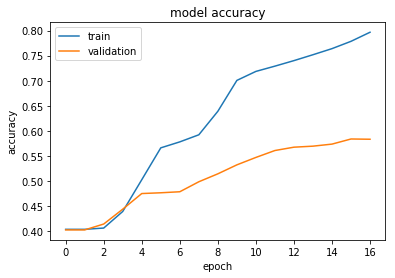

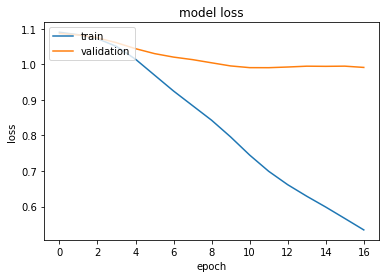

In [6]:
get_lstm_feats(16000,12,300,256)
